In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
import os
import zipfile

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset
#unziping the folder
zip_ref = zipfile.ZipFile("new-plant-diseases-dataset.zip", "r")
zip_ref.extractall("plant disease dataset")
zip_ref.close()

cp: cannot stat 'kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.70G/2.70G [01:11<00:00, 44.3MB/s]
100% 2.70G/2.70G [01:11<00:00, 40.3MB/s]


In [3]:
model = tf.keras.models.load_model('/content/drive/MyDrive/trained_model.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 30 variables whereas the saved optimizer has 58 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 254, 254, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 127, 127, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 125, 125, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 62, 62, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 16,275,862 (62.09 MB)

 Trainable params: 8,137,930 (31.04 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,137,932 (31.04 MB)

**Visualization of single image of Test Set**

In [5]:
!pip install opencv-python

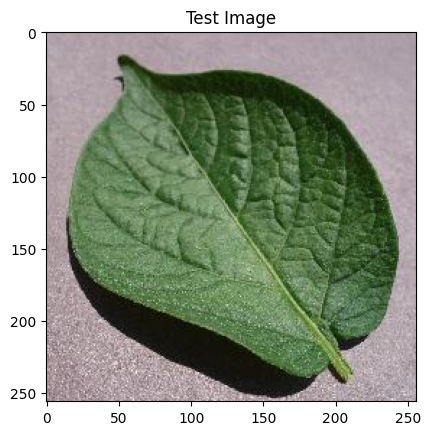

In [13]:
import cv2
image_path = "/content/plant disease dataset/test/test/PotatoHealthy1.JPG"
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # this will convert BGR image to RGB
#diaplying image
plt.imshow(img)
plt.title("Test Image")
plt.show()

In [14]:
!pwd

/content


**Testing model**

In [15]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(256, 256))
input_arr = tf.keras.preprocessing.image.img_to_array(img)
print(input_arr.shape)  # expected (256, 256, 3)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)

(256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [16]:
predictions = model.predict(input_arr)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[3.32132599e-10 1.65612164e-08 1.27997313e-09 2.23852635e-06
  1.76651294e-09 2.08707114e-08 1.89724699e-06 8.37083788e-12
  1.39153256e-13 1.40263712e-12 1.29226838e-12 2.92528918e-11
  1.42535761e-10 6.13422832e-13 5.98745331e-10 4.85751928e-09
  1.36136505e-10 2.35821296e-09 8.54704965e-08 4.78450329e-06
  2.80719070e-09 1.21964695e-05 9.99977469e-01 7.79487834e-08
  5.63960555e-07 8.81103003e-12 4.01859587e-11 5.10867494e-07
  7.35212499e-12 2.59138710e-10 8.00997435e-10 7.53256832e-11
  1.66816394e-10 1.42052170e-09 3.23928817e-09 2.40745596e-12
  1.52877548e-12 1.07272378e-10]]


In [17]:
result_index = np.argmax(predictions)
print(result_index)

22


In [18]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

**Displaying result of disease prediction**

Potato___healthy
Predicted Disease: Potato___healthy
Health Suggestion: No issues detected. Ensure proper soil health and pest control.


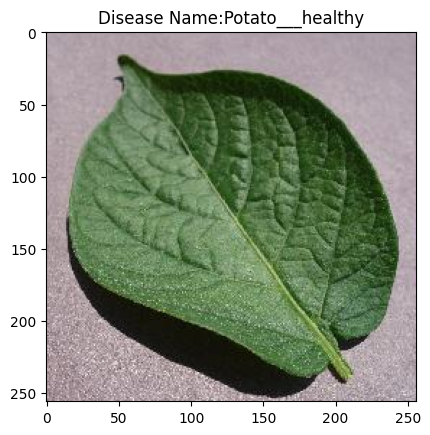

In [19]:
model_prediction = class_name[result_index]
print(model_prediction)
# Dictionary of health suggestions
health_suggestions = {
    'Apple___Apple_scab': "Prune infected leaves, apply fungicide, and ensure proper air circulation around trees.",
    'Apple___Black_rot': "Remove infected fruit and branches, use fungicide, and keep the orchard clean.",
    'Apple___Cedar_apple_rust': "Remove nearby cedar trees, use rust-resistant varieties, and apply fungicide.",
    'Apple___healthy': "No issues detected. Maintain regular watering and fertilization.",
    'Blueberry___healthy': "No issues detected. Ensure soil acidity is appropriate and provide adequate water.",
    'Cherry_(including_sour)___Powdery_mildew': "Use fungicide, avoid overhead watering, and prune affected areas.",
    'Cherry_(including_sour)___healthy': "No issues detected. Continue with regular care and monitoring.",
    'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': "Use fungicide, rotate crops, and remove infected debris.",
    'Corn_(maize)___Common_rust_': "Apply fungicide and use rust-resistant varieties.",
    'Corn_(maize)___Northern_Leaf_Blight': "Use resistant hybrids, rotate crops, and apply fungicide if necessary.",
    'Corn_(maize)___healthy': "No issues detected. Maintain regular care for optimal growth.",
    'Grape___Black_rot': "Remove and destroy infected leaves and fruit, and apply fungicide.",
    'Grape___Esca_(Black_Measles)': "Prune infected vines, ensure proper irrigation, and avoid over-fertilizing.",
    'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': "Use fungicide, prune affected areas, and ensure good air circulation.",
    'Grape___healthy': "No issues detected. Regular monitoring and care are recommended.",
    'Orange___Haunglongbing_(Citrus_greening)': "Remove infected trees, use resistant rootstocks, and control insect vectors.",
    'Peach___Bacterial_spot': "Apply copper-based bactericides, prune infected areas, and avoid overhead irrigation.",
    'Peach___healthy': "No issues detected. Continue with regular watering and care.",
    'Pepper,_bell___Bacterial_spot': "Use copper-based fungicide, rotate crops, and remove infected plants.",
    'Pepper,_bell___healthy': "No issues detected. Maintain consistent watering and nutrient supply.",
    'Potato___Early_blight': "Use fungicide, rotate crops, and remove plant debris after harvest.",
    'Potato___Late_blight': "Apply fungicide and practice crop rotation to minimize disease spread.",
    'Potato___healthy': "No issues detected. Ensure proper soil health and pest control.",
    'Raspberry___healthy': "No issues detected. Keep monitoring for pests and diseases.",
    'Soybean___healthy': "No issues detected. Regular crop rotation and pest monitoring are essential.",
    'Squash___Powdery_mildew': "Use fungicide, water at the base of the plant, and ensure good air circulation.",
    'Strawberry___Leaf_scorch': "Remove infected leaves, avoid overhead watering, and apply fungicide.",
    'Strawberry___healthy': "No issues detected. Continue regular monitoring and care.",
    'Tomato___Bacterial_spot': "Use copper-based sprays, avoid wetting leaves, and remove infected plants.",
    'Tomato___Early_blight': "Apply fungicide, remove affected leaves, and mulch plants to prevent soil splashing.",
    'Tomato___Late_blight': "Remove infected plants immediately, use fungicide, and avoid overhead irrigation.",
    'Tomato___Leaf_Mold': "Improve air circulation, use resistant varieties, and apply fungicide if necessary.",
    'Tomato___Septoria_leaf_spot': "Prune affected leaves, avoid overhead watering, and use fungicide.",
    'Tomato___Spider_mites Two-spotted_spider_mite': "Use insecticidal soap, keep plants well-watered, and encourage natural predators.",
    'Tomato___Target_Spot': "Apply fungicide and remove diseased leaves to prevent spread.",
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus': "Remove infected plants and control whiteflies with insecticidal soap.",
    'Tomato___Tomato_mosaic_virus': "Remove infected plants, disinfect tools, and avoid smoking near plants.",
    'Tomato___healthy': "No issues detected. Continue regular care and monitoring."
}


predicted_class = model_prediction

# Fetch the corresponding health suggestion
health_suggestion = health_suggestions.get(predicted_class, "No suggestion available.")

# Display the predicted disease and health suggestion
print(f"Predicted Disease: {predicted_class}")
print(f"Health Suggestion: {health_suggestion}")

plt.imshow(img)
plt.title(f"Disease Name:{model_prediction}")
plt.show()